<a href="https://colab.research.google.com/github/RanudeeFernando/PowerSpring/blob/model-implementation/notebooks/energy_consumption_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Replace with your raw GitHub URL
url = "https://raw.githubusercontent.com/RanudeeFernando/PowerSpring/main/datasets/electricityConsumptionAndProductioction.csv"

# Load CSV into Pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows
df.head()


,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       46011 non-null  object
 1   Consumption    46011 non-null  int64 
 2   Production     46011 non-null  int64 
 3   Nuclear        46011 non-null  int64 
 4   Wind           46011 non-null  int64 
 5   Hydroelectric  46011 non-null  int64 
 6   Oil and Gas    46011 non-null  int64 
 7   Coal           46011 non-null  int64 
 8   Solar          46011 non-null  int64 
 9   Biomass        46011 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 3.5+ MB


In [4]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       46011 non-null  datetime64[ns]
 1   Consumption    46011 non-null  int64         
 2   Production     46011 non-null  int64         
 3   Nuclear        46011 non-null  int64         
 4   Wind           46011 non-null  int64         
 5   Hydroelectric  46011 non-null  int64         
 6   Oil and Gas    46011 non-null  int64         
 7   Coal           46011 non-null  int64         
 8   Solar          46011 non-null  int64         
 9   Biomass        46011 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 3.5 MB


In [6]:
df.describe()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,46011,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000
mean,2021-08-16 11:19:47.715981056,6587.616440,6518.645628,1291.177501,792.310882,1857.052444,1171.890418,1193.157332,156.688031,55.851862
min,2019-01-01 00:00:00,3889.000000,3315.000000,562.000000,-26.000000,175.000000,198.000000,279.000000,0.000000,17.000000
25%,2020-04-24 06:30:00,5773.000000,5814.000000,1347.000000,236.000000,1347.000000,858.000000,962.000000,0.000000,45.000000
50%,2021-08-16 12:00:00,6552.000000,6462.000000,1383.000000,592.000000,1747.000000,1211.000000,1172.000000,2.000000,57.000000
75%,2022-12-08 15:30:00,7321.000000,7176.000000,1405.000000,1205.000000,2265.000000,1511.000000,1406.000000,280.000000,67.000000
max,2024-03-31 23:00:00,9615.000000,9886.000000,1457.000000,2811.000000,4434.000000,2141.000000,2537.000000,1137.000000,89.000000
std,NaN,1043.654923,986.805018,236.549637,675.812712,692.592157,434.748917,320.449368,229.502650,14.235554


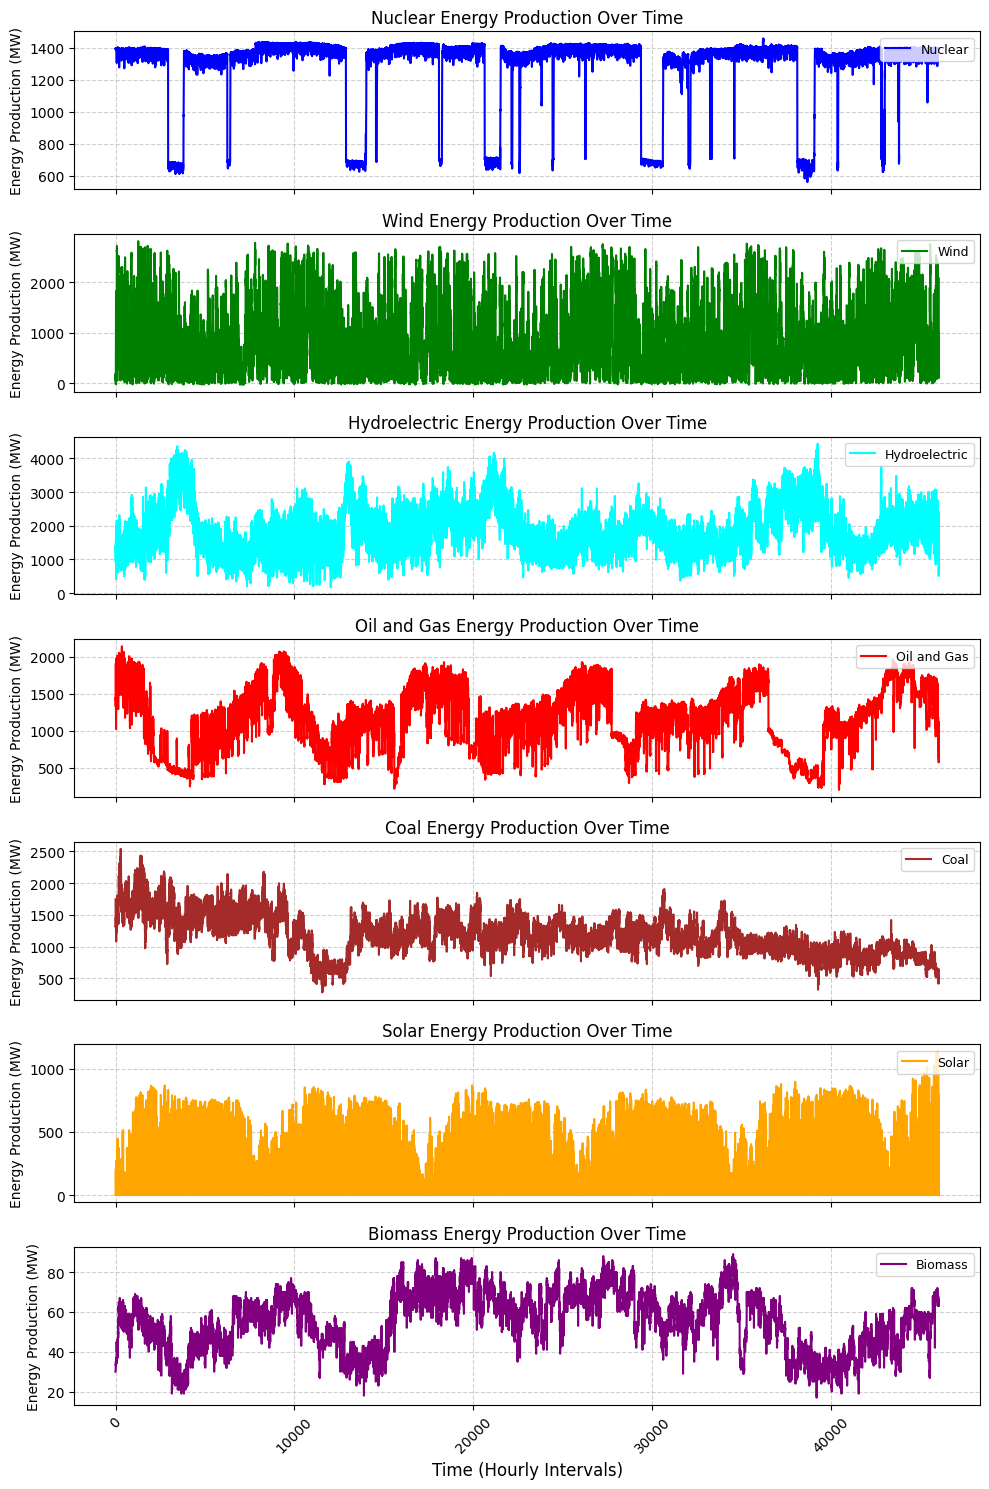

In [7]:
import matplotlib.pyplot as plt

# Define the energy sources
energy_sources = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Create subplots with improved styling
fig, axes = plt.subplots(nrows=len(energy_sources), ncols=1, figsize=(10, 15), sharex=True)

# Define colors for better differentiation
colors = ['blue', 'green', 'cyan', 'red', 'brown', 'orange', 'purple']

# Plot each energy source in its own subplot
for i, source in enumerate(energy_sources):
    axes[i].plot(df.index, df[source], label=source, color=colors[i], linewidth=1.5)
    axes[i].set_ylabel('Energy Production (MW)', fontsize=10)
    axes[i].set_title(f'{source} Energy Production Over Time', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].legend(loc="upper right", fontsize=9)

# Set common x-axis label and format layout
plt.xlabel('Time (Hourly Intervals)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


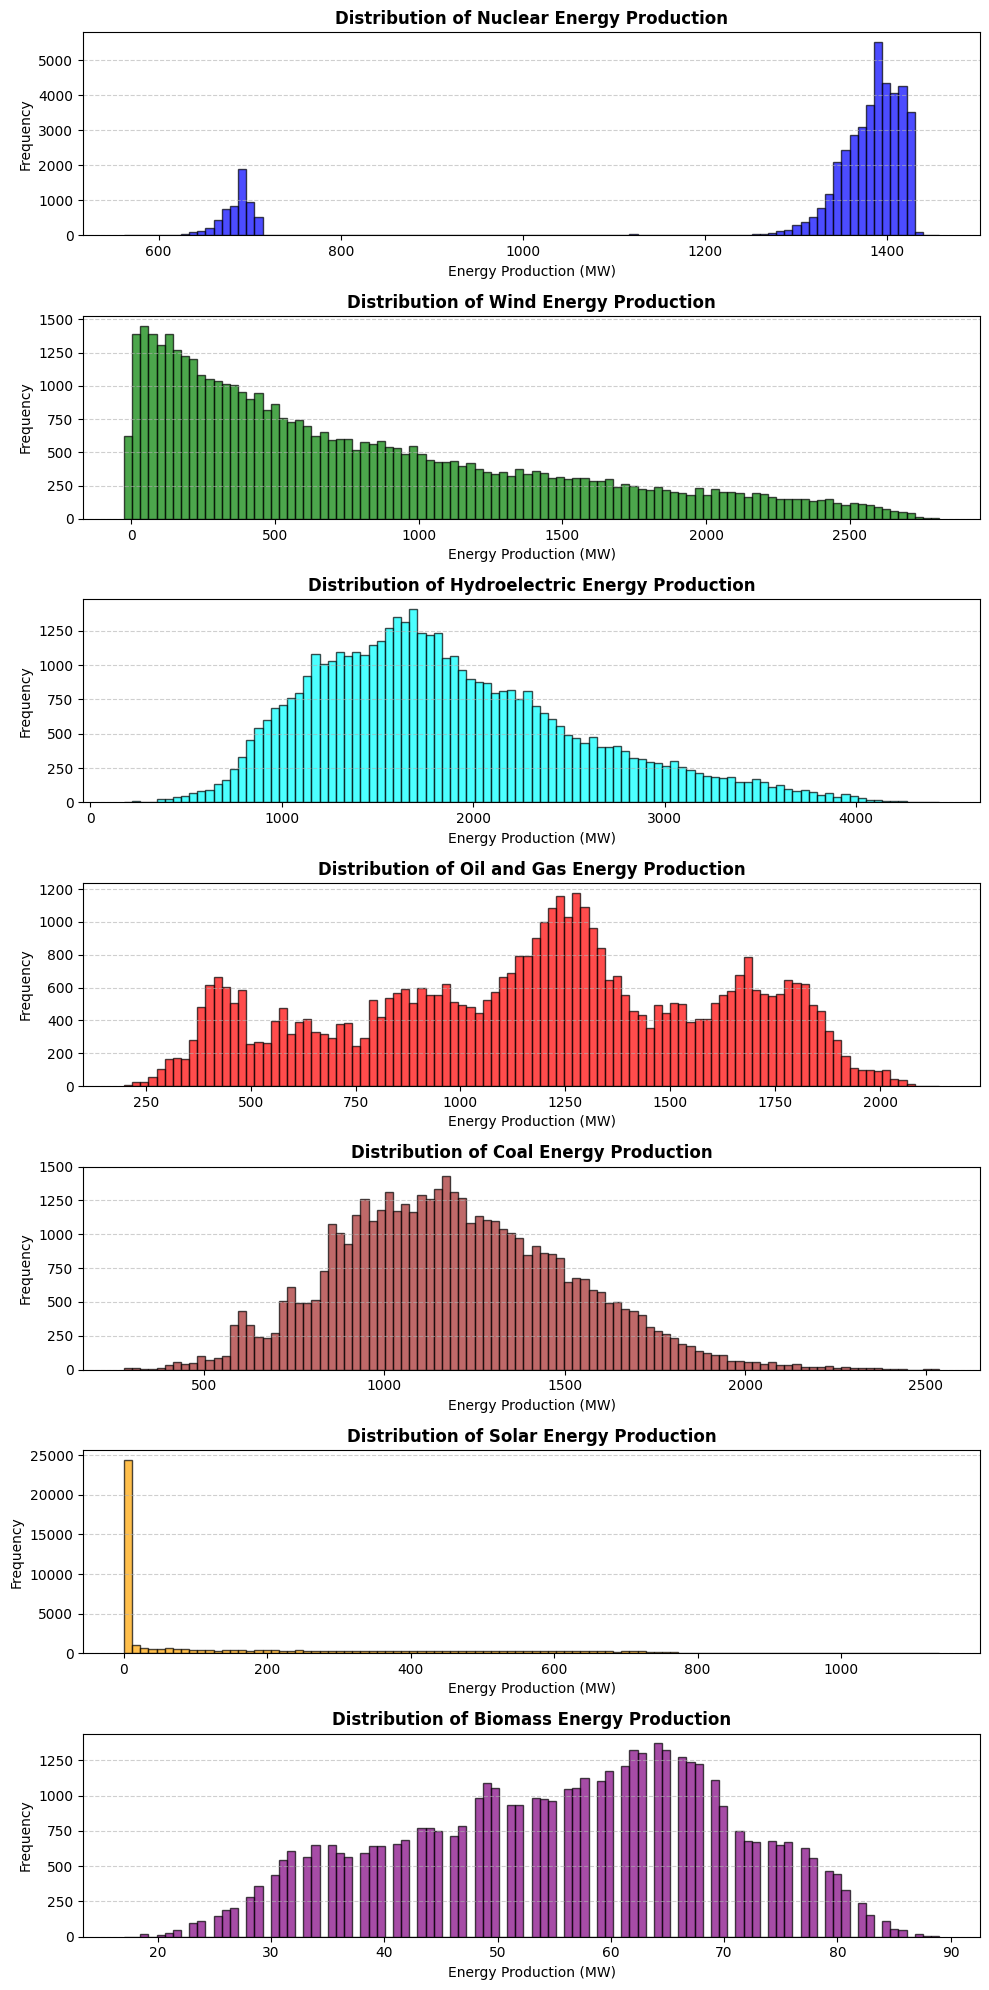

In [8]:
import matplotlib.pyplot as plt

# Define the energy sources
energy_sources = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Create subplots for histograms
fig, axes = plt.subplots(nrows=len(energy_sources), ncols=1, figsize=(10, 20))

# Define colors for better differentiation
colors = ['blue', 'green', 'cyan', 'red', 'brown', 'orange', 'purple']

# Plot histograms for each energy source
for i, source in enumerate(energy_sources):
    axes[i].hist(df[source], bins=100, color=colors[i], alpha=0.7, edgecolor='black')
    axes[i].set_xlabel('Energy Production (MW)', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].set_title(f'Distribution of {source} Energy Production', fontsize=12, fontweight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


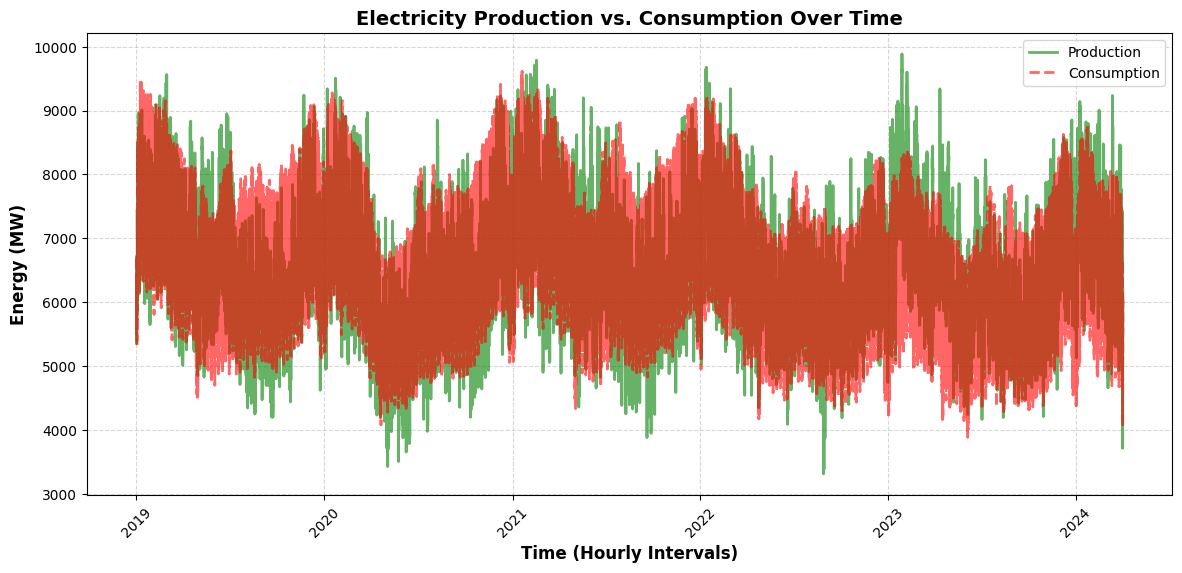

In [9]:
# Plot Production and Consumption over time with transparency
plt.figure(figsize=(14, 6))
plt.plot(df['DateTime'], df['Production'], label='Production', color='green', linewidth=2, alpha=0.6)
plt.plot(df['DateTime'], df['Consumption'], label='Consumption', color='red', linewidth=2, linestyle='dashed', alpha=0.6)

# Labels and title
plt.xlabel('Time (Hourly Intervals)', fontsize=12, fontweight='bold')
plt.ylabel('Energy (MW)', fontsize=12, fontweight='bold')
plt.title('Electricity Production vs. Consumption Over Time', fontsize=14, fontweight='bold')

# Grid and legend
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show plot
plt.show()


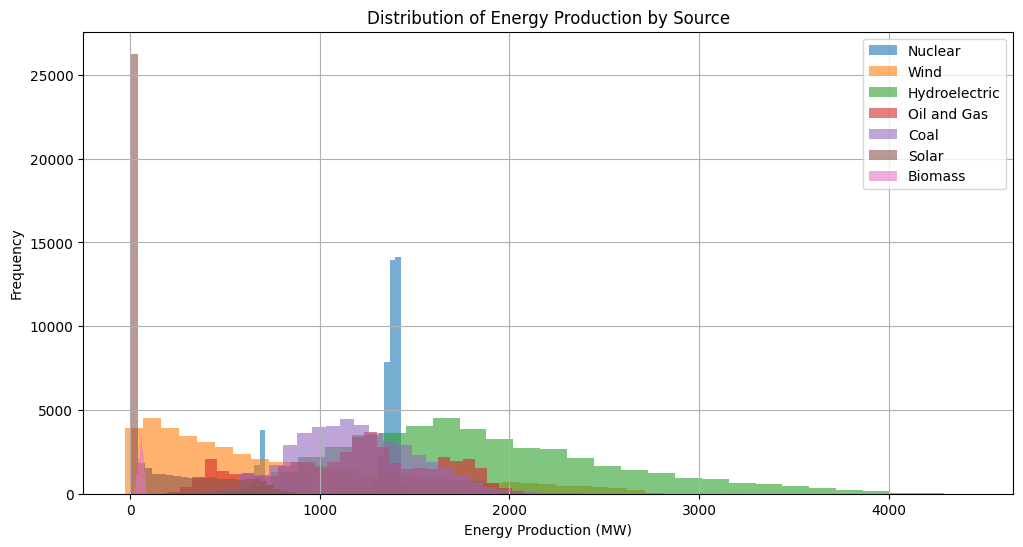

In [10]:
import matplotlib.pyplot as plt

energy_sources = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

plt.figure(figsize=(12, 6))
for source in energy_sources:
    plt.hist(df[source], bins=30, alpha=0.6, label=source)

plt.xlabel('Energy Production (MW)')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Production by Source')
plt.legend()
plt.grid(True)
plt.show()


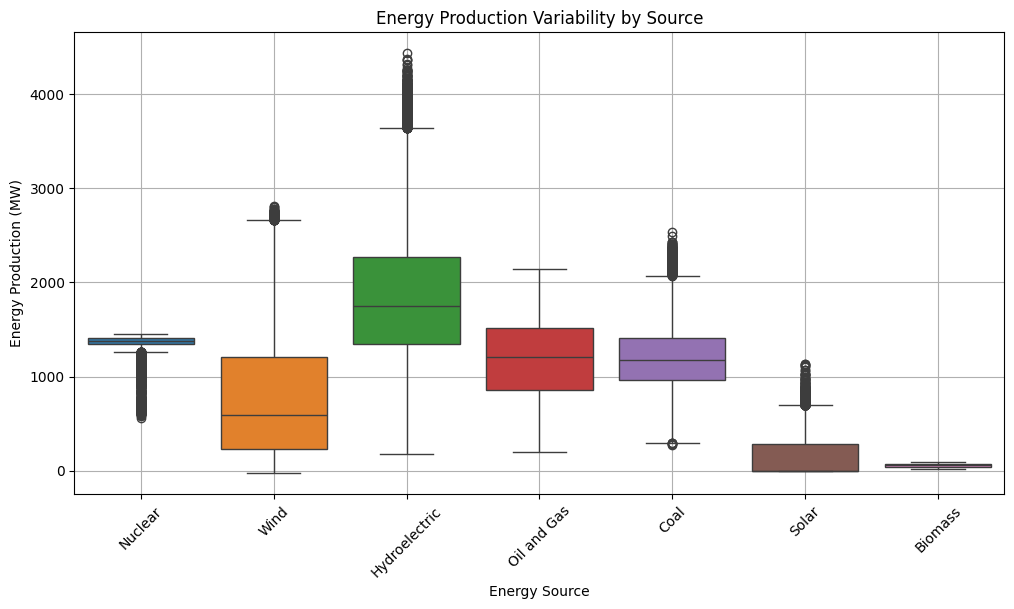

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[energy_sources])
plt.xlabel('Energy Source')
plt.ylabel('Energy Production (MW)')
plt.title('Energy Production Variability by Source')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


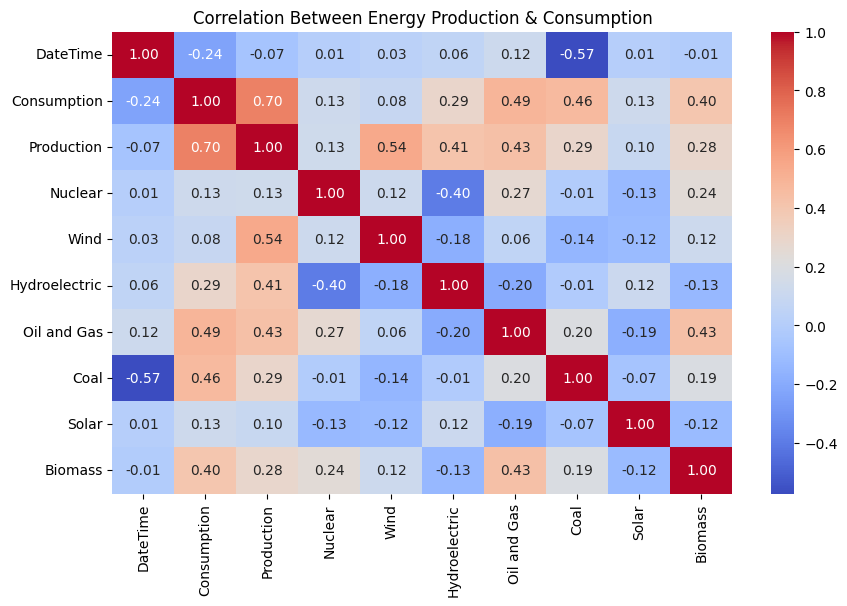

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Energy Production & Consumption')
plt.show()


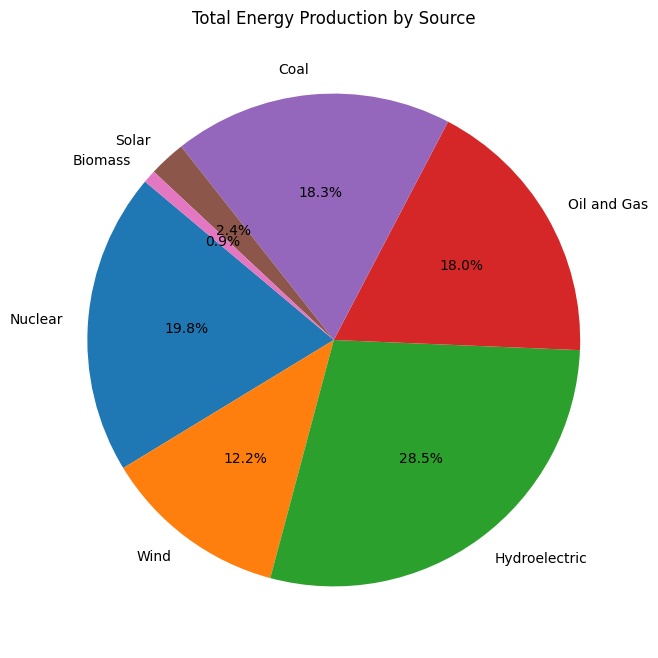

In [13]:
# Pie chart of total energy production by source
plt.figure(figsize=(8, 8))
total_production_by_source = df[energy_sources].sum()
plt.pie(total_production_by_source, labels=energy_sources, autopct='%1.1f%%', startangle=140)
plt.title('Total Energy Production by Source')
plt.show()


In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Select features: now including 'Consumption' and 'Production'
energy_sources = ['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
data = df[energy_sources].values

# Normalize the data before splitting
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Function to create sequences for RNN
def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])  # Predict next timestep
    return np.array(X), np.array(y)

# Define sequence length (e.g., using past 24 hours to predict the next)
SEQ_LENGTH = 24
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Split into training and testing sets (after sequence generation)
train_size = int(len(X) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, len(energy_sources))),
    Dropout(0.2),
    SimpleRNN(50, activation='relu'),
    Dense(len(energy_sources))  # Output layer for all energy sources
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model performance
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss (MSE): {train_loss}")
print(f"Test Loss (MSE): {test_loss}")

# Make predictions for both train and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values to original scale
train_predictions_original = scaler.inverse_transform(train_predictions)
test_predictions_original = scaler.inverse_transform(test_predictions)
y_train_original = scaler.inverse_transform(y_train)
y_test_original = scaler.inverse_transform(y_test)

# Compute R² Score for both train and test
r2_train = r2_score(y_train_original, train_predictions_original)
r2_test = r2_score(y_test_original, test_predictions_original)

print(f"Train R² Score: {r2_train:.4f}")
print(f"Test R² Score: {r2_test:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 0.0339 - val_loss: 0.0030
Epoch 2/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 3/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 4/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 5/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 6/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 7/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 8/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 9/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 11/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 12

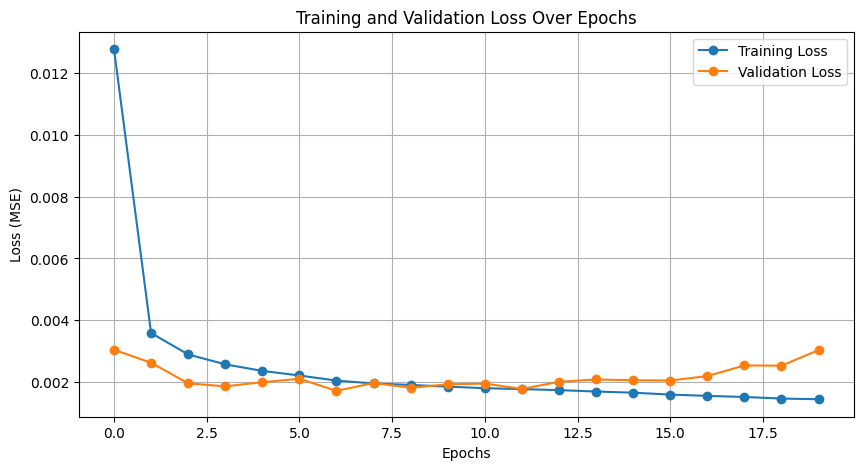

In [19]:
# Plot training & validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()


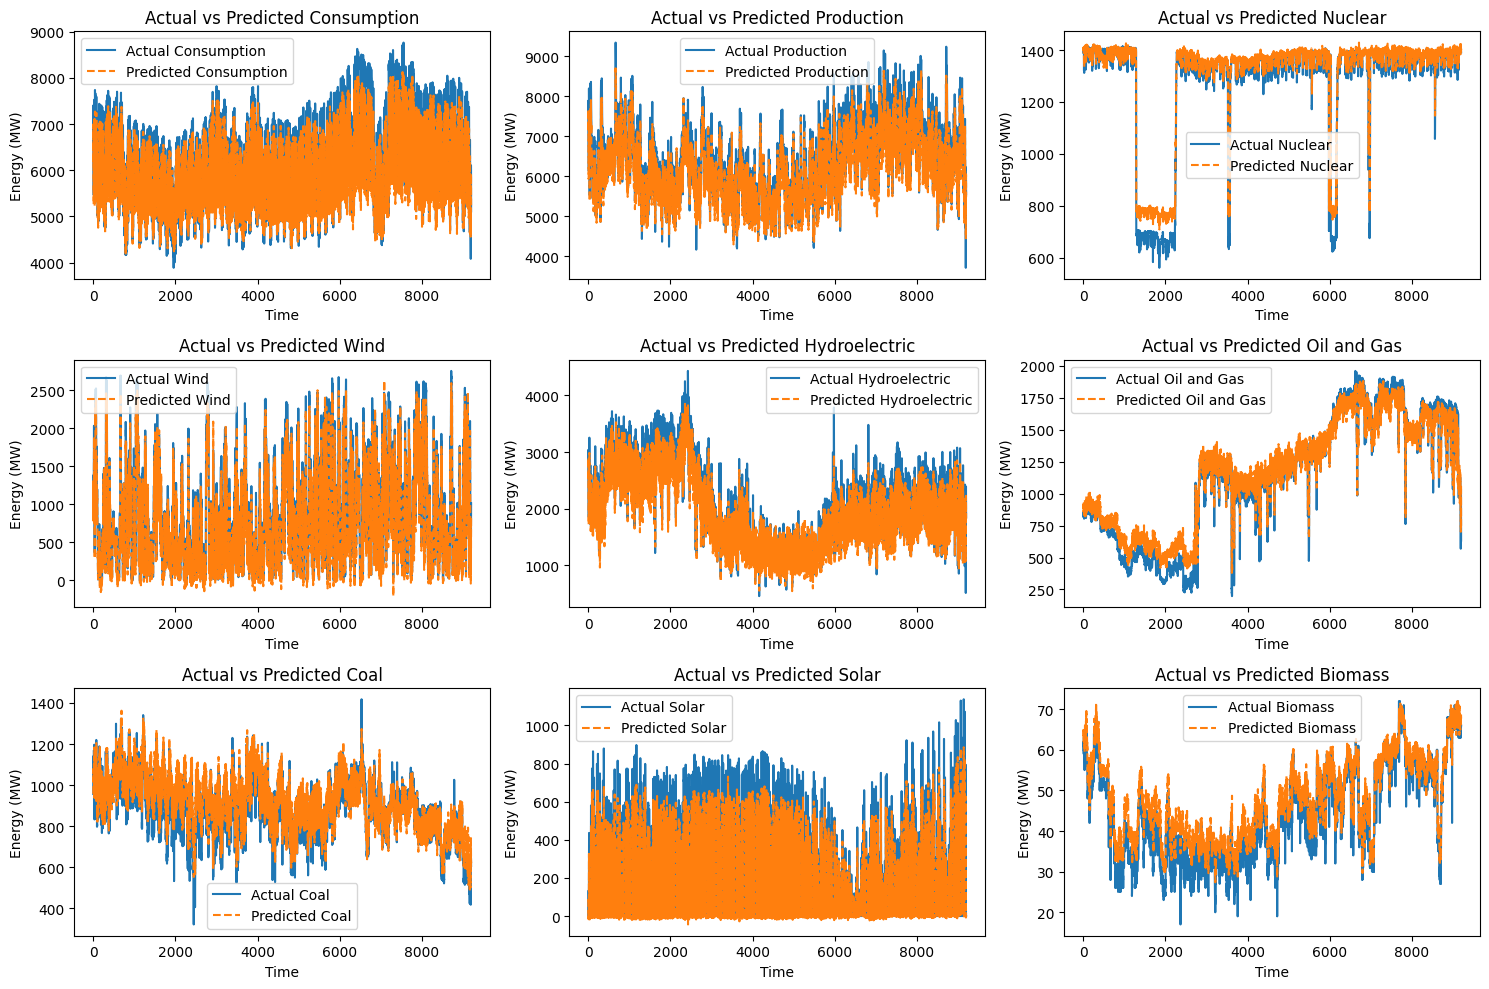

In [17]:
# Plot actual vs predicted for ALL energy sources
plt.figure(figsize=(15, 10))

for i, source in enumerate(energy_sources):
    plt.subplot(3, 3, i + 1)  # Arrange in 3x3 subplots
    plt.plot(y_test_original[:, i], label=f"Actual {source}")
    plt.plot(test_predictions_original[:, i], label=f"Predicted {source}", linestyle='dashed')
    plt.xlabel("Time")
    plt.ylabel("Energy (MW)")
    plt.title(f"Actual vs Predicted {source}")
    plt.legend()

plt.tight_layout()
plt.show()
